In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
import random
from random import shuffle 
from PIL import Image
from tqdm import tqdm 
from PIL import Image

from imageio import imread
import scipy.ndimage
import scipy 
import seaborn as sns

from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import os
path = "C:/Users/vasud/Desktop/MS in Software Engineering SJSU/Fall 2020/255 - Data Mining/Rentinal Classification Project/resized_train/resized_train/"

In [2]:
labels = pd.read_csv('C:/Users/vasud/Desktop/MS in Software Engineering SJSU/Fall 2020/255 - Data Mining/Rentinal Classification Project/resized_train/trainLabels.csv')
labels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


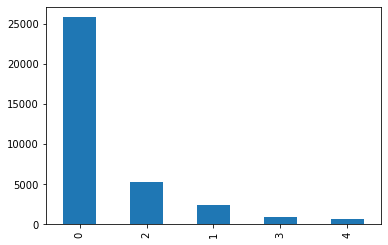

In [3]:
labels["level"].value_counts().plot(kind="bar")

In [4]:
%%time
level_0 = labels["image"][labels['level'] == 0].tolist()
level_1 = labels["image"][labels['level'] == 1].tolist()
level_2 = labels["image"][labels['level'] == 2].tolist()
level_3 = labels["image"][labels['level'] == 3].tolist()
level_4 = labels["image"][labels['level'] == 4].tolist()

no_DR = random.choices(level_0, k=2832)
level_1 = random.choices(level_1,k=708)
level_2 = random.choices(level_2,k=708)
level_3 = random.choices(level_3,k=708)
level_4 = random.choices(level_4,k=708)
with_DR = np.concatenate((level_1,level_2,level_3,level_4))


Train_no_DR = [cv2.imread(path+"/"+str(x)+".jpeg") for x in no_DR]
print("Reading into Train_no_DR done")
Train_with_DR = [cv2.imread(path+"/"+str(x)+".jpeg") for x in with_DR]
print("Reading into Train_with_DR done")
image_size = 128


# Y Train values
y_Train_no_DR = [0]*len(no_DR)
y_Train_with_DR = [1]*len(level_1) + [2]*len(level_2) + [3]*len(level_3) + [4]*len(level_4)

Reading into Train_no_DR done
Reading into Train_with_DR done
Wall time: 9min 38s


In [5]:
len(y_Train_no_DR),len(y_Train_with_DR)

(2832, 2832)

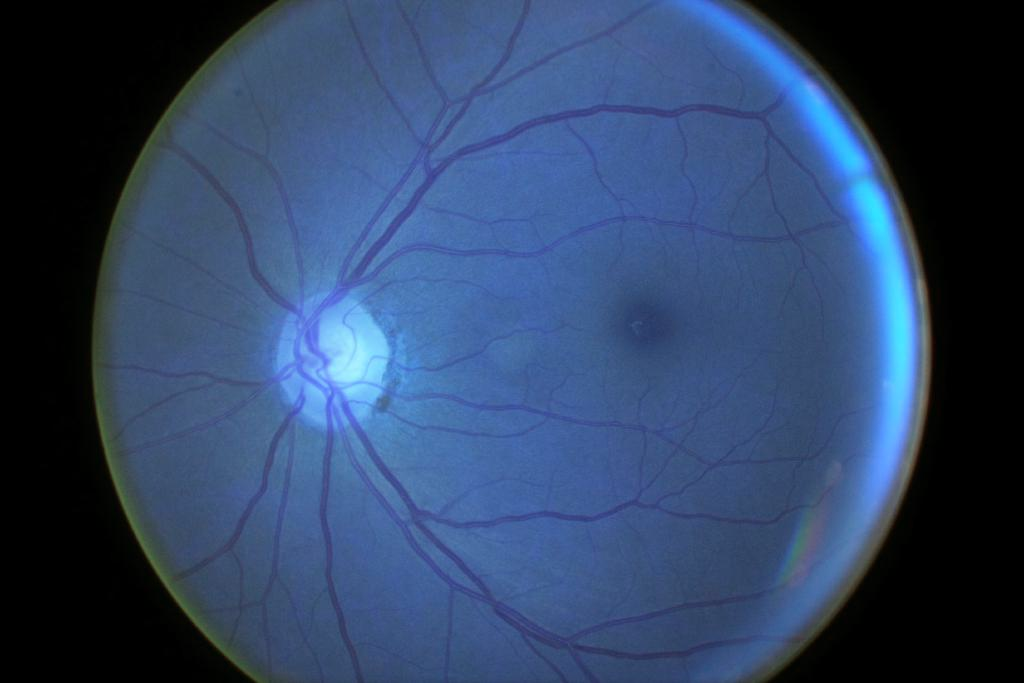

In [6]:
Image.fromarray(Train_no_DR[13])

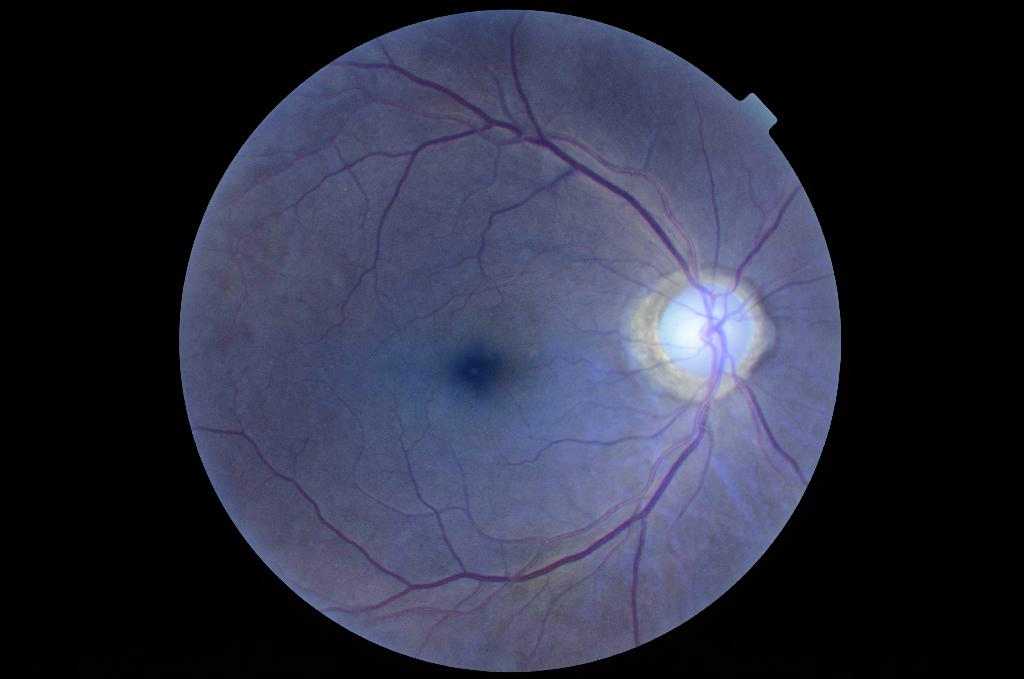

In [7]:
Image.fromarray(Train_with_DR[0])

Text(0.5, 1.0, 'images with and without Diabetic Retenopathy in GrayScale')

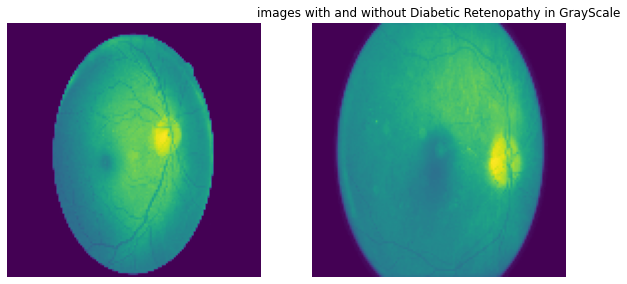

In [8]:
exp_lis = []
for image in Train_no_DR:
    try:
        img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (image_size, image_size)).flatten()
        np_img = np.asarray(img)
    except:
        exp_lis.append(image)
    
for image2 in Train_with_DR:
    try:
        img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
        img2 = cv2.resize(img2, (image_size, image_size)).flatten()
        np_img2 = np.asarray(img2)
    except:
        exp_lis.append(image2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("images with and without Diabetic Retenopathy in GrayScale")

In [9]:
print(exp_lis)

[]


In [10]:
def train_data():
    train_data_no_DR = [] 
    train_data_with_DR=[]
    exp_list = []
    for image1 in Train_no_DR:
        try:
            img1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
            img1 = cv2.resize(img1, (image_size, image_size))
            train_data_no_DR.append(img1)
        except:
            exp_list.append(image)
        
    for image2 in Train_with_DR:
        try:
            img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
            img2 = cv2.resize(img2, (image_size, image_size))
            train_data_with_DR.append(img2)
        except:
            exp_list.append(image2)
 
    train_data= np.concatenate((np.asarray(train_data_no_DR),np.asarray(train_data_with_DR)),axis=0)
    return train_data 

In [11]:
traindata = train_data() 

In [12]:
x_data = traindata
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [13]:
y_data = pd.Series(y_Train_no_DR+y_Train_with_DR)

In [14]:
y_data.value_counts()

0    2832
3     708
2     708
1     708
4     708
dtype: int64

In [15]:
print("X shape: " , x_data.shape)
print("Y shape: " , len(y_data))

X shape:  (5664, 128, 128)
Y shape:  5664


In [16]:
number_of_data = x_data.shape[0]
x_flatten = x_data.reshape(number_of_data,x_data.shape[1]*x_data.shape[2])
print("X flatten",x_flatten.shape)

X flatten (5664, 16384)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_flatten, y_data, test_size=0.3, random_state=42)


In [18]:
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (3964, 16384)
x test:  (1700, 16384)
y train:  (3964,)
y test:  (1700,)


In [19]:
%%time
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Wall time: 24.1 s


LogisticRegression()

In [20]:
y_pred = logreg.predict(x_test)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.86      0.68       877
           1       0.20      0.05      0.08       212
           2       0.13      0.02      0.04       189
           3       0.42      0.18      0.25       219
           4       0.30      0.24      0.27       203

    accuracy                           0.51      1700
   macro avg       0.32      0.27      0.26      1700
weighted avg       0.42      0.51      0.43      1700



In [23]:
logreg.score(x_train,y_train),\
logreg.score(x_test,y_test)

(0.5502018163471241, 0.5064705882352941)

In [25]:
from sklearn.decomposition import PCA
# Preprocessing with PCA
reduced_pca = PCA(n_components=0.85)
reduced_pca.fit(x_train)
X_train_reduced = reduced_pca.transform(x_train)
X_test_reduced = reduced_pca.transform(x_test)
print("Reduced Shape:", X_train_reduced.shape)

Reduced Shape: (3964, 5)


In [29]:
logreg.fit(X_train_reduced, y_train)
print("Testing Accuracy", logreg.score(X_test_reduced,y_test))

Testing Accuracy 0.5164705882352941


In [30]:
y_pred = logreg.predict(X_test_reduced)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       877
           1       0.00      0.00      0.00       212
           2       0.00      0.00      0.00       189
           3       0.00      0.00      0.00       219
           4       0.60      0.01      0.03       203

    accuracy                           0.52      1700
   macro avg       0.22      0.20      0.14      1700
weighted avg       0.34      0.52      0.35      1700

